# Resources and references

inspired thesis: http://cs.au.dk/~cstorm/students/Chong_Jul2009.pdf
And the data are gethared from *https://investing.com*

# Data Info
In our data, the column names were not given but the order is CLOSE, OPEN, HIGH, LOW and CHANGE

Data type: EUR/USD daily data.

the dates between 01/01/1980 and 28/02/2019 were used for train, validation.

test data would be march april or even other future dates.

**important: data should be reversed after read with pandas. The dataset from the investing.com is reversed. This effects prediction.**

# Task Info

Binary classification.
Classifies if the given time will have a higher value or lower value.

Later: Regression
Tries to predict exact price.

# Purpose

- find out if using more data on daily forecasting is a good idea
- use regression to predict a value

# Imports and Mount google drive

In [0]:
from __future__ import print_function, absolute_import, division

# general imports for deep learning
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# data read
import pandas as pd

# plot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

# json and pretty print
import json
import pprint

# to persist the numpy arrays data
import h5py

# handle logging
tf.logging.set_verbosity(tf.logging.INFO)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
# check if correct place
!ls '/content/gdrive/My Drive/deep_learning/_data/forex/daily_csv/'

 EUR_USD_1980_1990.csv	 EUR_USD_2019_jan_feb.csv
 EUR_USD_1991_2000.csv	'EUR_USD Historical Data.csv'
 EUR_USD_2001_2018.csv	'EUR_USD Historical Data.gsheet'


# Loading Data

## Functions of Data Handling

In [0]:
# Tries to concatenate a list of arrays into one array
def get_concatenated_dataset(d_list):
  result_data = d_list[0]
  for d in d_list[1:]:
    result_data = np.concatenate((result_data, d), axis=None)
    
  return result_data

# Tries to check if the concatenated list is correct.
def concatenate_length_check(d_list, concatenated):
  print("----------- length check -----------")
  total_length = 0
  for d in d_list:  
    total_length += len(d)
    print("length: " +str(len(d)))

  print("concatenated length "+str(len(concatenated)))
  if(len(concatenated) == total_length):
    print("concatenated length -----------> CORRECT")
  else:
    print("concatenated length -----------> WRONG")

## Read Data

In [0]:
# initialize file names
data_folder = "/content/gdrive/My Drive/deep_learning/_data/forex/daily_csv/"
data_filenames = []
data_filenames.append("EUR_USD_2019_jan_feb.csv")
data_filenames.append("EUR_USD_2001_2018.csv")
data_filenames.append("EUR_USD_1991_2000.csv")
data_filenames.append("EUR_USD_1980_1990.csv")


In [0]:
# get train data that will be both validation and train data in training mode
data_1 = pd.read_csv(data_folder+data_filenames[0])
data_2 = pd.read_csv(data_folder+data_filenames[1])
data_3 = pd.read_csv(data_folder+data_filenames[2])
data_4 = pd.read_csv(data_folder+data_filenames[3])

# Get all data as list
data_list = [data_1, data_2, data_3, data_4]

In [7]:
# print for understand the context
# NOTE: it is reversed
print(data_3.tail())
print(data_4.head())
print(data_4.tail())
#test_data_list[0].head()

              Date   Price    Open    High     Low Change %
2598  Jan 08, 1991  1.3432  1.3432  1.3453  1.3373   -0.25%
2599  Jan 07, 1991  1.3465  1.3465  1.3627  1.3370   -1.54%
2600  Jan 04, 1991  1.3675  1.3675  1.3825  1.3675   -0.74%
2601  Jan 03, 1991  1.3777  1.3777  1.3807  1.3742    0.03%
2602  Jan 02, 1991  1.3773  1.3773  1.3822  1.3678    0.75%
           Date   Price    Open    High     Low Change %
0  Dec 31, 1990  1.3670  1.3670  1.3705  1.3584    0.71%
1  Dec 28, 1990  1.3574  1.3574  1.3595  1.3455    1.26%
2  Dec 27, 1990  1.3405  1.3405  1.3445  1.3340    0.49%
3  Dec 26, 1990  1.3339  1.3339  1.3339  1.3339    0.00%
4  Dec 25, 1990  1.3339  1.3339  1.3339  1.3339    0.00%
              Date   Price    Open    High     Low Change %
2806  Jan 08, 1980  1.5108  1.5108  1.5108  1.5108   -0.40%
2807  Jan 07, 1980  1.5168  1.5168  1.5168  1.5168    0.26%
2808  Jan 04, 1980  1.5129  1.5129  1.5129  1.5129   -0.32%
2809  Jan 03, 1980  1.5177  1.5177  1.5177  1.5177    0.18

## Read Train Data

In [8]:
# Get OPEN, HIGH, LOW, CLOSE columns in all data
open_data_list=[]
high_data_list=[]
low_data_list=[]
close_data_list=[]

for d in data_list:
  open_data_list.append(d['Open'].as_matrix())
  high_data_list.append(d['High'].as_matrix())
  low_data_list.append(d['Low'].as_matrix())
  close_data_list.append(d['Price'].as_matrix())
  
# And CONCATENATE all of them
all_open_data = get_concatenated_dataset(open_data_list)
all_high_data = get_concatenated_dataset(high_data_list)
all_low_data = get_concatenated_dataset(low_data_list)
all_close_data = get_concatenated_dataset(close_data_list)
  
# CHECK IF CONCATENATION IS SUCCESSUL.
concatenate_length_check(open_data_list, all_open_data)
concatenate_length_check(high_data_list, all_high_data)
concatenate_length_check(low_data_list, all_low_data)
concatenate_length_check(close_data_list, all_close_data)

----------- length check -----------
length: 63
length: 4696
length: 2603
length: 2811
concatenated length 10173
concatenated length -----------> CORRECT
----------- length check -----------
length: 63
length: 4696
length: 2603
length: 2811
concatenated length 10173
concatenated length -----------> CORRECT
----------- length check -----------
length: 63
length: 4696
length: 2603
length: 2811
concatenated length 10173
concatenated length -----------> CORRECT
----------- length check -----------
length: 63
length: 4696
length: 2603
length: 2811
concatenated length 10173
concatenated length -----------> CORRECT


## Flip Data

In [9]:
# REVERSE THE DATA BEFORE CONTINUE
all_open_data = np.flip(all_open_data, 0)
all_high_data = np.flip(all_high_data, 0)
all_low_data = np.flip(all_low_data, 0)
all_close_data = np.flip(all_close_data, 0)

print("OPEN HIGH LOW CLOSE data were flipped successfully for both rain and test data.")


OPEN HIGH LOW CLOSE data were flipped successfully for both rain and test data.


In [10]:
# should be: array([1.5149, 1.5177, 1.5129, ..., 1.1313, 1.1274, 1.1252])
print(all_open_data)
print(all_high_data)
print(all_low_data)
print(all_close_data)

[1.5149 1.5177 1.5129 ... 1.1313 1.1274 1.1252]
[1.5149 1.5177 1.5129 ... 1.1329 1.1286 1.1263]
[1.5149 1.5177 1.5129 ... 1.1263 1.1242 1.1234]
[1.5149 1.5177 1.5129 ... 1.1266 1.1252 1.1255]


# General Values

In [0]:
# BATCH size of the lstm model
#BATCH_SIZES = [32, 64, 128, 256, 512]
BATCH_SIZE = 32

# How many of the past points were involved.
#WINDOWS = [32, 64, 128, 256, 512]
WINDOW = 32

# How many of data type is used as multivariate(open,high,low,close = 4)
EMB_SIZE = 4

# While training how many points should be ignored
STEP = 1

# Determines which time should be predictied
#(1 = 1 min further is predicted)
#(60 = 1 hour further is predicted)
FORECAST = 1

# Determines if the data is to be load.
LOAD = False

# Construct Data

## Functions

In [0]:
# ORIGINAL CHANEGD TO REGRESSION
def get_data_chunks(d_list, length, window=30, forecast=1, step=1):
  X = []
  Y = []
  for i in range(0, length, step):
    try:
      # Get windowed data
      o = d_list[0][i:i+window] # open
      h = d_list[1][i:i+window] # high
      l = d_list[2][i:i+window] # low
      c = d_list[3][i:i+window] # close

      # Normalize data
      # NO NORMALIZATION FOR NOW
#      mean_c = np.mean(c)
#      std_c = np.std(c)
      
#      o = (np.array(o) - np.mean(o)) / np.std(o)
#      h = (np.array(h) - np.mean(h)) / np.std(h)
#      l = (np.array(l) - np.mean(l)) / np.std(l)
#      c = (np.array(c) - np.mean(c)) / np.std(c)

      # x_i
      x_i = d_list[3][i:i+window]
      y_i = d_list[3][i + window + forecast]

      x_i = np.column_stack((o,h,l,c))
    except Exception as e:
      print(e)
      # break when the limit is not enough
      break

    X.append(x_i)
    Y.append(y_i)
  print("data chunks are ready...")
  return [X, Y]

def get_train_validation(X, y, percentage=0.8):
    iXPercentage = int(len(X) * percentage) 
    iYPercentage = int(len(y) * percentage)
    X_train = X[0:iXPercentage]
    Y_train = y[0:iYPercentage]
    
    #X_train, Y_train = shuffle_in_unison(X_train, Y_train)

    X_val = X[iXPercentage:]
    Y_val = y[iYPercentage:]

    return X_train, X_val, Y_train, Y_val

In [0]:
def save_data(x,y,x_test,y_test):
  # Save X, Y and X_test, Y_test
  save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
  filename="d_fx_multi_fcst_1980_2018"

  # Save Y
  y_h5 = h5py.File(save_folder+filename+"_y.h5", 'w')
  y_h5.create_dataset('dataset_Y', data=y)
  y_h5.close()
  print("Saving Y Completed")

  # Save X
  x_h5 = h5py.File(save_folder+filename+"_x.h5", 'w')
  x_h5.create_dataset('dataset_X', data=x)
  x_h5.close()
  print("Saving X Completed")

  # Save X_test
  x_test_h5 = h5py.File(save_folder+filename+"_x_test.h5", 'w')
  x_test_h5.create_dataset('dataset_X_test', data=x_test)
  x_test_h5.close()
  print("Saving X_test Completed")

  # Save Y_test
  y_test_h5 = h5py.File(save_folder+filename+"_y_test.h5", 'w')
  y_test_h5.create_dataset('dataset_Y_test', data=y_test)
  y_test_h5.close()
  print("Saving Y_test Completed")


In [0]:
def get_data(should_loaded, d_list, d_list_test, train_len, test_len, window):
  if not should_loaded:
    # PROCESSES WHOLE TRAIN SET
    X, Y = get_data_chunks(d_list, train_len, window=window, forecast=FORECAST, step=STEP)
    X_test, Y_test = get_data_chunks(d_list_test, test_len, window=window, forecast=FORECAST, step=STEP)

    X = np.array(X)
    Y = np.array(Y)
    X_test = np.array(X_test)
    Y_test = np.array(Y_test)
  else:
    save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
    filename="d_fx_multi_fcst_1980_2018"
    
    h5f = h5py.File(save_folder+filename+"_x.h5",'r')
    X = h5f['dataset_X'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_y.h5",'r')
    Y = h5f['dataset_Y'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_x_test.h5",'r')
    X_test = h5f['dataset_X_test'][:]
    h5f.close()

    h5f = h5py.File(save_folder+filename+"_y_test.h5",'r')
    Y_test = h5f['dataset_Y_test'][:]
    h5f.close()
    pass
  
  return [X, Y, X_test, Y_test]



## Get Data

In [15]:
X_list = []
Y_list = []
X_test_list = []
Y_test_list = []
mean_std_list = []

if not LOAD:
  d_list = [all_open_data, all_high_data, all_low_data, all_close_data]
  #d_list_test = [t_all_open_data, t_all_high_data, t_all_low_data, t_all_close_data]

  print("getting data for window: "+str(WINDOW))
  X, Y, X_test, Y_test = get_data(should_loaded=LOAD, 
                                                   d_list=d_list, 
                                                   d_list_test=d_list, 
                                                   train_len=len(all_close_data), 
                                                   test_len=len(all_close_data), 
                                                   window=WINDOW)
    
  X_list.append(X)
  Y_list.append(Y)
  X_test_list.append(X_test)
  Y_test_list.append(Y_test)
else:
    X, Y, X_test, Y_test = get_data(should_loaded=LOAD, 
                                d_list=None, 
                                d_list_test=None, 
                                train_len=0, 
                                test_len=0)

    #if not LOAD: save_data(X, Y, X_test, Y_test)


getting data for window: 32
index 10173 is out of bounds for axis 0 with size 10173
data chunks are ready...
index 10173 is out of bounds for axis 0 with size 10173
data chunks are ready...


In [16]:
print(X_list[0].shape)


(10140, 32, 4)


## Split Test
Before splitting to validation, split the test data first.

In [17]:
calculated_size = X_list[0].shape[0] - BATCH_SIZE
X = X_list[0][:calculated_size]
Y = Y_list[0][:calculated_size]

X_test = X_test_list[0][calculated_size:]
Y_test = Y_test_list[0][calculated_size:]

print("old: "+str(X_list[0].shape))
print("X size: "+str(X.shape))
print("Y size: "+str(Y.shape))
print("X_test size: "+str(X_test.shape))
print("Y_test size: "+str(Y_test.shape))

old: (10140, 32, 4)
X size: (10108, 32, 4)
Y size: (10108,)
X_test size: (32, 32, 4)
Y_test size: (32,)


## Split Validation

In [18]:
X_train, X_val, Y_train, Y_val = get_train_validation(X, Y)
  
print("OLD_shapes for windows: "+str(WINDOW))
print(X.shape)
print(Y.shape)
print("*"*40)
print("New Shapes for windows: "+str(WINDOW))
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print("-"*50)

OLD_shapes for windows: 32
(10108, 32, 4)
(10108,)
****************************************
New Shapes for windows: 32
(8086, 32, 4)
(8086,)
(2022, 32, 4)
(2022,)
--------------------------------------------------


In [0]:
def get_smooth_size(old_size, batch_size=32):
  new_size = old_size - old_size%batch_size
  print("Smoothed from: ["+str(old_size)+"] to: ["+str(new_size)+"]")
  return new_size

Now it is time to smooth

However in here some data  lost

for example we get the smoothness bellow for the window size 64.

Smoothed from: [8035] to: [8000]
Smoothed from: [64] to: [64]
Smoothed from: [2009] to: [1984]

TODO: 35 data could be added to the validation data before smoothing it.

In [20]:
# MAKE THE DATA SMOOT FOR LSTM MODEL
train_smooth_size = get_smooth_size(X_train.shape[0], batch_size=BATCH_SIZE)
test_smooth_size = get_smooth_size(X_test.shape[0], batch_size=BATCH_SIZE)
val_smooth_size = get_smooth_size(X_val.shape[0], batch_size=BATCH_SIZE)

X_train = X_train[:train_smooth_size] 
X_test = X_test[:test_smooth_size] 
X_val = X_val[:val_smooth_size] 

Y_train = Y_train[:train_smooth_size]
Y_test = Y_test[:test_smooth_size]
Y_val = Y_val[:val_smooth_size]

Smoothed from: [8086] to: [8064]
Smoothed from: [32] to: [32]
Smoothed from: [2022] to: [2016]


## MODELS

In [0]:
def build_lstm_model_1(tensor_shape, batch_size=100, hidden_neurons=100):
  model = tf.keras.Sequential()
# hyperbolic tangent is automatically seleceted as activation function
  model.add(layers.LSTM(hidden_neurons, batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1])))

  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(1))
  return model

In [0]:
def build_lstm_model_2(tensor_shape, batch_size=100, hidden_neurons=100):
  model = tf.keras.Sequential()
# hyperbolic tangent is automatically seleceted as activation function
  model.add(layers.LSTM(hidden_neurons, batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]),return_sequences=True))
  model.add(layers.LSTM(hidden_neurons, batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1])))
#  model.add(layers.GlobalAveragePooling1D())
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(0.5))
  
  model.add(layers.Dense(1))
  return model

In [0]:
#TODO: weight initialization and L2 regularization
# A linear layer with L2 regularization of factor 0.02


def build_lstm_model_3(tensor_shape, batch_size=100, hidden_neurons=100, pooling_size=2):
  # L2 norm regularizer
  regularizer = tf.keras.regularizers.l2(0.01)
  
  # XAVIER INITIALIZER
  initializer = tf.keras.initializers.glorot_uniform()
  
  model = tf.keras.Sequential()
  
# hyperbolic tangent is automatically seleceted as activation function
  model.add(layers.LSTM(hidden_neurons, 
                        batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]),
                        recurrent_regularizer=regularizer,
                        bias_regularizer=regularizer, 
                        kernel_regularizer=regularizer,
                        recurrent_initializer=initializer,
                        kernel_initializer=initializer,
                        bias_initializer=initializer
                       ))

  model.add(layers.BatchNormalization())
#  model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer, kernel_initializer=initializer, bias_initializer=initializer))
  model.add(layers.Dense(1))
  return model

In [0]:
def build_conv1d_model_1(tensor_shape, filters=64, kernel_size=3, pooling_size=2, dropout=0.5):
  #todo: maybe add strides
  
  # initialize the placeholdder
  placeholder_input = tf.keras.Input(shape=tensor_shape)
  
  #------------- FIRST CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same",
                        input_shape=tensor_shape,
                        batch_input_shape=(None, tensor_shape[0], tensor_shape[1]),
                        activation='relu')(placeholder_input)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  
  # CONSIDER:  model = layers.BatchNormalization(model)  
  # ------------- Second CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same", 
                        activation='relu')(model)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  # ------------- DROPOUT & FLATTEN ------------- 
  model = layers.Dropout(dropout)(model)
  model = layers.Flatten()(model)
  
  
  model = layers.Dense(32, activation='relu')(model)
  model = layers.Dropout(dropout)(model)
  # not sure if this necessary 1
  #model = layers.Activation(activation='relu')(model)
  
  prediction = layers.Dense(1)(model)
  
  model = tf.keras.Model(inputs=placeholder_input, outputs=prediction)
  return model

In [0]:
def build_conv1d_model_2(tensor_shape, filters=64, kernel_size=3, pooling_size=2, dropout=0.5):
  # L2 norm regularizer
  regularizer = tf.keras.regularizers.l2(0.01)
  
  # XAVIER INITIALIZER
  initializer = tf.keras.initializers.glorot_uniform()
  
  # initialize the placeholdder
  placeholder_input = tf.keras.Input(shape=tensor_shape)
  
  #------------- FIRST CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same",
                        input_shape=tensor_shape,
                        batch_input_shape=(None, tensor_shape[0], tensor_shape[1]),
                        activation='relu',                         
                        kernel_regularizer=regularizer, 
                        bias_regularizer=regularizer,
                        kernel_initializer=initializer,
                        bias_initializer=initializer)(placeholder_input)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  
  # CONSIDER:  model = layers.BatchNormalization(model)  
  # ------------- Second CNN BLOCK: CONV1D & MAXPOOLING ------------- 
  model = layers.Conv1D(filters=filters, 
                        kernel_size=kernel_size, 
                        padding="same", 
                        activation='relu',
                        kernel_regularizer=regularizer, 
                        bias_regularizer=regularizer,
                        kernel_initializer=initializer,
                        bias_initializer=initializer)(model)
  
  model = layers.MaxPool1D(pool_size=pooling_size, 
                           padding="same")(model)
  # ------------- DROPOUT & FLATTEN ------------- 
  model = layers.Dropout(dropout)(model)
  model = layers.Flatten()(model)
  
  
  model = layers.Dense(32, activation='relu',
                       kernel_regularizer=regularizer, 
                       bias_regularizer=regularizer,
                       kernel_initializer=initializer,
                       bias_initializer=initializer)(model)
  
  model = layers.Dropout(dropout)(model)
  # not sure if this necessary 1
  #model = layers.Activation(activation='relu')(model)
  
  prediction = layers.Dense(1)(model)
  
  model = tf.keras.Model(inputs=placeholder_input, outputs=prediction)
  return model

In [0]:
def build_dense_model_1(tensor_shape, batch_size):
  # L2 norm regularizer
  regularizer = tf.keras.regularizers.l2(0.01)
  
  # XAVIER INITIALIZER
  initializer = tf.keras.initializers.glorot_uniform()
  
  # initialize the placeholdder
  placeholder_input = tf.keras.Input(shape=tensor_shape)
  
  #------------- calculate the feasable neuron size ------------- 
  hidden_neuron_size = batch_size/2 + 1
  model = layers.Dense(hidden_neuron_size,
                       batch_input_shape=(batch_size, tensor_shape[0], tensor_shape[1]),
                       activation='relu',
                       kernel_regularizer=regularizer,
                       bias_regularizer=regularizer,
                       kernel_initializer=initializer,
                       bias_initializer=initializer)(placeholder_input)
  model = layers.GlobalAveragePooling1D()(model)
  model = layers.Dense(hidden_neuron_size,
                       activation='relu',
                       kernel_regularizer=regularizer,
                       bias_regularizer=regularizer,
                       kernel_initializer=initializer,
                       bias_initializer=initializer)(model)

  prediction = layers.Dense(1)(model)
  
  model = tf.keras.Model(inputs=placeholder_input, outputs=prediction)
  return model

In [0]:
#KERNEL_SIZES = [3,4,5]
#FILTER_SIZES = [32, 64, 128]
#NEURONS = [100, 200]
neuron = 100
kernel_size = 3
filter_size = 32

### All Models

In [0]:
# NOTE: model3 seems nice.
shape = (X_train.shape[1], X_train.shape[2])
x1 = build_lstm_model_1(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
x2 = build_lstm_model_2(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
x3 = build_lstm_model_3(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
c1 = build_conv1d_model_1(tensor_shape=shape, filters=filter_size, kernel_size=kernel_size)
c2 = build_conv1d_model_2(tensor_shape=shape, filters=filter_size, kernel_size=kernel_size)
models = [x1, x2, x3, c1, c2]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Efficient Models

In [29]:
# NOTE: model3 seems nice.
shape = (X_train.shape[1], X_train.shape[2])
m1 = build_conv1d_model_2(tensor_shape=shape, filters=filter_size, kernel_size=kernel_size)
m2 = build_lstm_model_3(tensor_shape=shape, batch_size=BATCH_SIZE, hidden_neurons=neuron)
models = [m1, m2]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Train Process

In [30]:
for m in models:
  print(m.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 4)             0         
_________________________________________________________________
conv1d (Conv1D)              (None, 32, 32)            416       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 16, 32)            3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
dropout (Dropout)            (None, 8, 32)             0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
__________

In [0]:
#OPTIMIZER
opt_1 = 'adam'
opt_2 = tf.keras.optimizers.RMSprop(0.001)
opt_3 = tf.keras.optimizers.Adadelta(0.01)
#opt = tf.keras.optimizers.RMSprop()

loss_func = tf.keras.losses.mean_squared_error
metrics =  ['mean_absolute_error', 'mean_squared_error']


# CALLBACKS
save_folder = "/content/gdrive/My Drive/deep_learning/_data/numpy_arrays/"
default_filename = "model"

checkpointer_list = []
for model_index in range(len(models)):
  m = models[model_index]
  fp = save_folder + default_filename + "_"+str(model_index)+".hdf5"
  checkpointer_list.append(tf.keras.callbacks.ModelCheckpoint(filepath=fp, verbose=1, save_best_only=True))
  
  m.compile(optimizer=opt_3, loss=loss_func, metrics=metrics)


In [0]:
# TENSORBOARD CALLBACK
#_tensorboard = TensorBoardColab()
_tensorboard = None

In [0]:
histories = []

In [44]:
EPOCH_COUNT = 10000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


#histories = []
#for i in range(len(models)):
#  m = models[i]
#  history_m = m.fit(
#      X_train, Y_train, 
#      epochs = EPOCH_COUNT, batch_size = BATCH_SIZE, verbose=1, 
#      validation_data=(X_val, Y_val),
#      callbacks=[early_stop, checkpointer_list[i]])
#    
#  histories.append(history_m)

i = 1
m = models[i]
history_m = m.fit(X_train, Y_train,
                  epochs = EPOCH_COUNT, 
                  batch_size = BATCH_SIZE, 
                  verbose=1, 
                  validation_data=(X_val, Y_val),
                  callbacks=[early_stop, checkpointer_list[i]])

8032/8064 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0286 - mean_squared_error: 0.0012
Epoch 00192: val_loss improved from 0.00023 to 0.00020, saving model to /content/gdrive/My Drive/deep_learning/_data/numpy_arrays/model_1.hdf5
8064/8064 [==============================] - 23s 3ms/sample - loss: 0.0013 - mean_absolute_error: 0.0286 - mean_squared_error: 0.0012 - val_loss: 1.9967e-04 - val_mean_absolute_error: 0.0079 - val_mean_squared_error: 1.0599e-04
Epoch 193/10000
8032/8064 [============================>.] - ETA: 0s - loss: 0.0013 - mean_absolute_error: 0.0283 - mean_squared_error: 0.0012
Epoch 00193: val_loss did not improve from 0.00020
8064/8064 [==============================] - 23s 3ms/sample - loss: 0.0013 - mean_absolute_error: 0.0283 - mean_squared_error: 0.0012 - val_loss: 2.7450e-04 - val_mean_absolute_error: 0.0110 - val_mean_squared_error: 1.8323e-04
Epoch 194/10000
8032/8064 [============================>.] - ETA: 0s - loss: 0.0

In [45]:
histories.append(history_m)
histories

In [46]:
histories[0].history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error'])

# Plot

In [0]:
def plot_history(history):
  dim = [0.0, 0.05]
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim(dim)
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim(dim)
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
  plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val loss')
  plt.ylim(dim)
  plt.legend()
  plt.show()

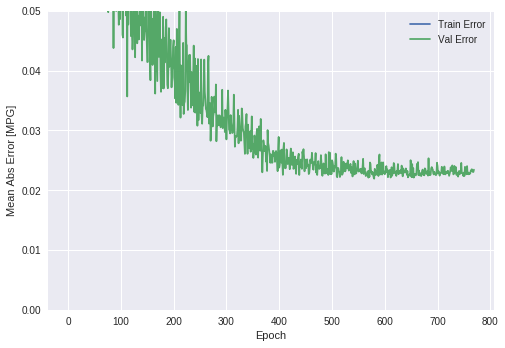

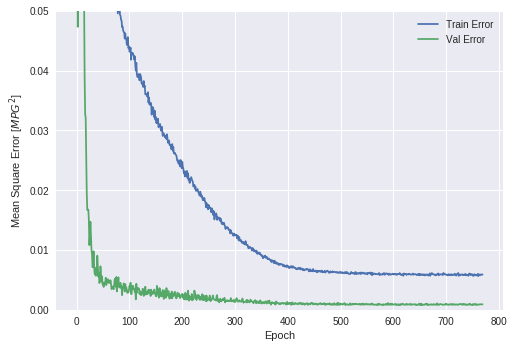

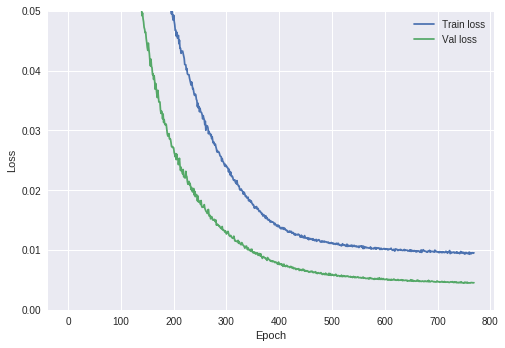

In [37]:
plot_history(histories[0])

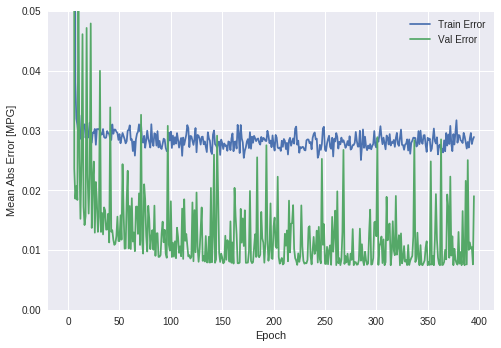

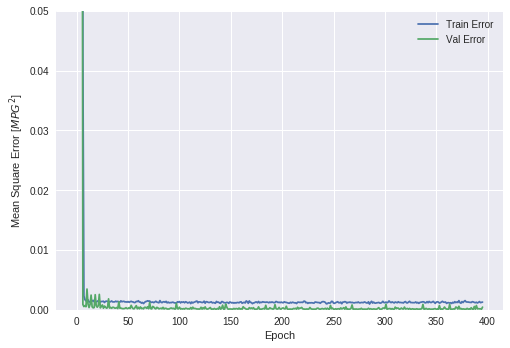

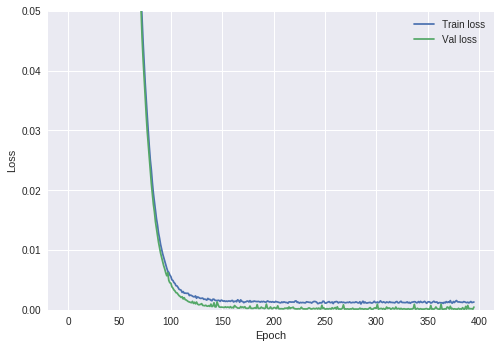

In [48]:
plot_history(histories[1])

In [49]:
r = X_test
t = Y_test
#print("r0:"+str(r[0]))
print("t0:"+str(t[0]))
print("i:"+str(i))
pred = models[i].predict(r)

t0:1.1267
i:1


In [50]:
models[i].evaluate(X_test, Y_test, batch_size=BATCH_SIZE)

32/32 [==============================] - 0s 1ms/sample - loss: 3.4776e-04 - mean_absolute_error: 0.0176 - mean_squared_error: 3.3790e-04


[0.0003477586433291435, 0.017623682, 0.00033789582]

In [52]:
k = len(X_test) - 2
print(pred[k]/pred[k+1])
print(t[k]/t[k+1])
print("t[k-1]: "+str(t[k-1]))
print("t[k]:"+str(t[k]))
print("p[k+1] improved: "+str(t[k]*(pred[k+1]/pred[k])))
print("t[k+1]: "+str(t[k+1]))

[1.0026481]
0.9997334517992004
t[k-1]: 1.1266
t[k]:1.1252
p[k+1] improved: [1.1222283]
t[k+1]: 1.1255
